In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def plot_paths(paths, labels, xlabel='$epoch$', ylabel=r'$\theta$', ndim=2):
    
    markers = ('o', '^', 'd', 's', 'p', 'h', '*', '>', '<', 'v', '+', 'h', 'x')
    
    i = 0
    for path, label in zip(paths,labels):
        if ndim == 2:
            plt.plot(path[:,0], path[:,1], label=label, 
                     marker='.', lw=0.5, markersize=4,) #markers[i]
        elif ndim == 1:
            plt.plot(path[:,0], label=label, 
                     marker='.', lw=0.5, markersize=4,)

        i += 1
    
    plt.xlabel(xlabel, fontsize=17)
    plt.ylabel(ylabel, fontsize=17)
    plt.legend(loc='best')

In [5]:
def hypothesis_function(X, theta):
    return X.dot(theta)

def error_function(y_hat, y):
    N = y.shape[0]
    return 1 / N * (y_hat - y).T.dot(y_hat - y)

def cost_function(X, theta, y):
    y_hat = hypothesis_function(X, theta)
    return error_function(y_hat, y)

def quartic_error_function(y_hat, y):
    """
        f(x) = 0.5 \sum_i (x_i^4 - 16x_i^2 + 5x_i)
    """
    N = y.shape[0]
    deltay = y_hat - y
    deltay2 = deltay.T.dot(deltay)
    deltay4 = deltay2 ** 2
    
    return 1 / N * 0.5 * (deltay4 - 16*deltay2 + 5*np.sum(deltay))

def quartic_cost_function(X, theta, y):
    y_hat = hypothesis_function(X, theta)
    return quartic_error_function(y_hat, y)

In [6]:
def minibatch_gradient_descent(X, y, n_epochs=100, minibatch_size=20):
    
    def learning_schedule(t, t0=5, t1=50):
        return t0 / (t + t1)
    
    N, D = X.shape
    K = y.shape[1]
    
    theta_path, J_path = [], []
    
    theta = np.random.randn(D, 1)

    t = 0
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(N)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, N, minibatch_size):
            t += 1

            xi = X_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            yi_hat = hypothesis_function(xi, theta)

            gradients = 2 / minibatch_size * xi.T.dot(yi_hat - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients
            
        # end for i

        J = error_function(yi_hat, yi)
        theta_path.append(theta)
        J_path.append(J)
        
    # end for epoch
    
    return np.array(theta_path).reshape(-1,D), np.array(J_path).reshape((-1,K))

In [8]:
def stochastic_gradient_descent(X, y, n_epochs=100, eta=0.1):
    
    def learning_schedule(t, t0=5, t1=50):
        return t0 / (t + t1)
    
    N, D = X.shape
    K = y.shape[1]
    
    theta_path, J_path = [], []
    
    theta = np.random.randn(D, 1)

    t = 0
    for epoch in range(n_epochs):
        for i in range(N):
            t += 1
            rand_index = np.random.randint(N)
            xi = X[rand_index:rand_index+1]
            yi = y[rand_index:rand_index+1]

            yi_hat = hypothesis_function(xi, theta)

            gradients = 2 * xi.T.dot(yi_hat - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients   
        # end for i
        
           
        J = error_function(yi_hat, yi)
        theta_path.append(theta)
        J_path.append(J)
        
    
    # end for epoch
    
    return np.array(theta_path).reshape(-1,D), np.array(J_path).reshape((-1,K))



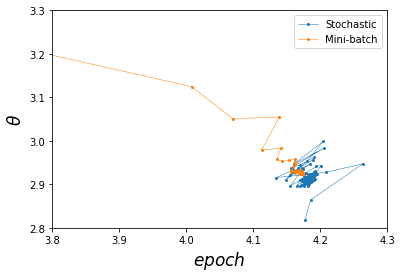

In [12]:
np.random.seed(42)

N = 1000
X = 2 * np.random.rand(N, 1)
y = 4 + 3 * X + np.random.randn(N,1)
X_b = np.c_[np.ones((N, 1)), X]

#plt.plot(X, y, 'b.')

theta_path_sgd, J_path_sgd = stochastic_gradient_descent(X_b, y)
theta_path_mbg, J_path_mbg = minibatch_gradient_descent(X_b, y)

plt.figure(1)
plt.xlim(3.8, 4.3)
plt.ylim(2.8, 3.3)
plot_paths([theta_path_sgd, theta_path_mbg], ['Stochastic', 'Mini-batch'])

In [13]:
'{:b}'.format(0)

'0'

In [19]:
format(25, '0{}b'.format(11))[::-1]

'10011000000'

In [20]:
np.exp(-1.0 * np.array([[1.0, 3.5], [2.2, 7.1]]))

array([[0.36787944, 0.03019738],
       [0.11080316, 0.0008251 ]])

In [ ]:
def merge_sort(mylist, start=0, end=-1):

    n = len(mylist)
    if n == 1:
        return mylist
    elif n == 2:


    a = merge_sort(mylist, 0, n//2)
    b = merge_sort(mylist, n//2, -1)

